In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

[Text(0.5, 1, 'testis'),
 Text(1.5, 1, 'ovary'),
 Text(2.5, 1, 'colon'),
 Text(3.5, 1, 'prostate'),
 Text(4.5, 1, 'breast'),
 Text(5.5, 1, 'blood'),
 Text(6.5, 1, 'kidney'),
 Text(7.5, 1, 'lung'),
 Text(8.5, 1, 'muscle')]

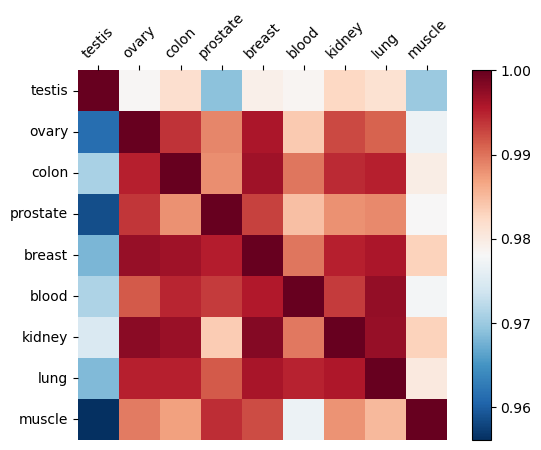

In [32]:
#Fig 3C
#heatmap for tissue pairs
import seaborn as sns

ROCper_data = pd.read_csv('./DM_all_AUROC_percent.csv',index_col=0)
ax = sns.heatmap(data=ROCper_data,square=True,cmap="RdBu_r",cbar=False)
ax.xaxis.tick_top()
#设置colorbar的数值大小和位数
cb1 = ax.figure.colorbar(ax.collections[0])
cb1.set_ticks([0.96, 0.97,0.98, 0.99, 1.00])
ax.set_xticklabels(labels=ROCper_data.columns, rotation = 45)
plt.clf()

[Text(0.5, 1, 'testis'),
 Text(1.5, 1, 'ovary'),
 Text(2.5, 1, 'colon'),
 Text(3.5, 1, 'prostate'),
 Text(4.5, 1, 'breast'),
 Text(5.5, 1, 'blood'),
 Text(6.5, 1, 'kidney'),
 Text(7.5, 1, 'lung'),
 Text(8.5, 1, 'muscle')]

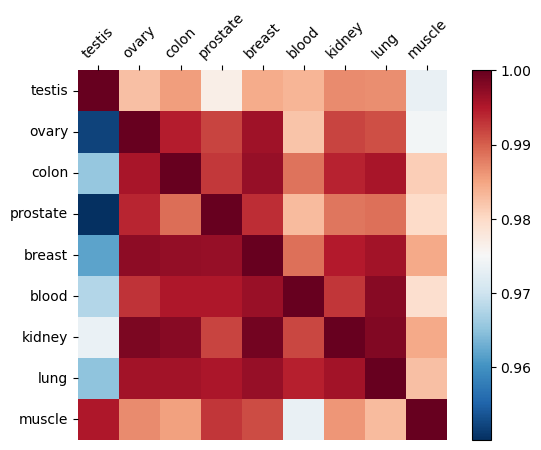

In [24]:
PRCper_data = pd.read_csv('./DM_all_AUPRC_percent.csv',index_col=0)
ax = sns.heatmap(data=PRCper_data,square=True,cmap="RdBu_r",cbar=False)
ax.xaxis.tick_top()
#设置colorbar的数值大小和位数
cb1 = ax.figure.colorbar(ax.collections[0])
cb1.set_ticks([0.96, 0.97,0.98, 0.99, 1.00])
ax.set_xticklabels(labels=PRCper_data.columns, rotation = 45)
plt.clf()

In [ ]:
#Fig 5B
snp_cpg_raw = pd.read_csv('./snp_cpg_pairs.csv',index_col=0)
SNP_effect = np.load('./DMseqwhole_effectsize.npy')
SNP_effect=pd.DataFrame(SNP_effect)
SNP_effect=-np.log10(SNP_effect)
snp_cpg_dis=pd.concat([snp_cpg_raw.iloc[:,-2:],SNP_effect],axis=1)
snp_cpg_dis.columns=['distance','relative distance to cpg site','-log10(effect size)']

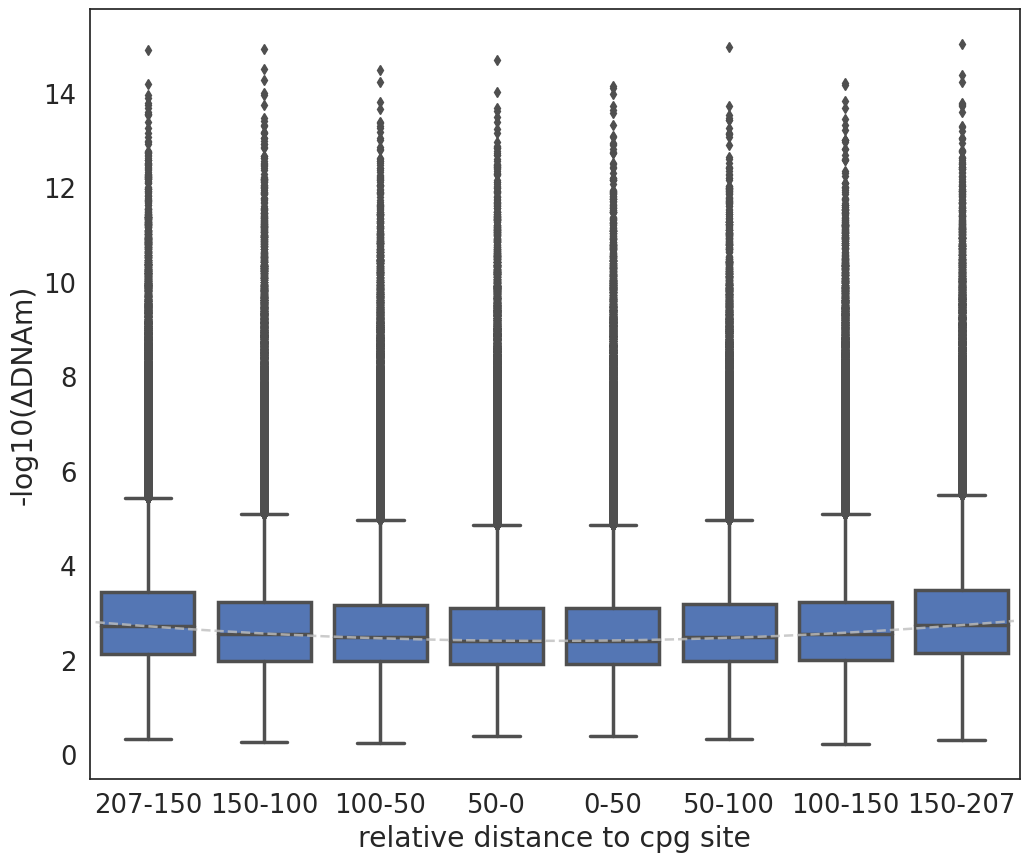

In [55]:
#Fig 5B
#plot
sns.set_theme(context='notebook',style='white', font='Arial',font_scale=1.7)#设置图表背景颜色字体
x_order=['207-150','150-100','100-50','50-0','0-50','50-100','100-150','150-207']
plt.figure(figsize=(12,10))
sns.boxplot(x='relative distance to cpg site',y='-log10(effect size)',data=snp_cpg_dis,color='#4472C4',linewidth=2.5,order=x_order)
plt.ylabel('-log10(ΔDNAm)')
#plt.title('the relationship of effect size and relative distance')
#sns.despine()

#画拟合曲线
#取每个分类的中位数
x_line = []
for i in x_order:
    a = snp_cpg_dis[snp_cpg_dis.loc[:,'relative distance to cpg site'] == i]
    a = a.loc[:,'-log10(effect size)'].median()
    x_line = np.append(x_line,a)

y_line = x_order
#二次曲线拟合
def function_1(x,a,b,c):
    return a*x*x+b*x+c
#画线
popt, pcov = curve_fit(function_1,range(len(x_line)),x_line)
x = np.linspace(-0.45,len(x_line)-0.55,100)
y = function_1(x, *popt)
plt.plot(x, y, color='#BFBFBF', linestyle='--', linewidth=1.8, alpha=0.8, zorder=10, label='fit')

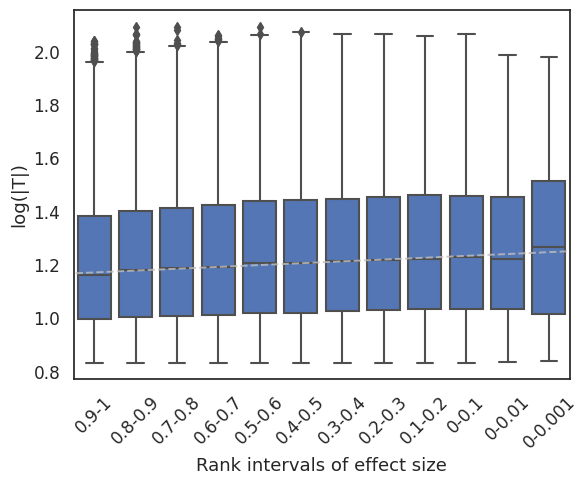

In [124]:
#Fig5C
sns.set_theme(context='notebook',style='white', font='Arial', font_scale=1.1)#设置图表背景颜色字体
x_order=['0.9-1','0.8-0.9','0.7-0.8','0.6-0.7','0.5-0.6','0.4-0.5','0.3-0.4','0.2-0.3','0.1-0.2','0-0.1','0-0.01','0-0.001']
ax = sns.boxplot(x='class',y='logabsT',data=whole_class,order=x_order,color='#4472C4')
ax.set_xticklabels(labels = ['0.9-1','0.8-0.9','0.7-0.8','0.6-0.7','0.5-0.6','0.4-0.5','0.3-0.4','0.2-0.3','0.1-0.2','0-0.1','0-0.01','0-0.001'],
                                    rotation = 45)
plt.xlabel('Rank intervals of effect size', fontsize = 13)
plt.ylabel('log(|T|)', fontsize = 13)


#画拟合曲线
#取每个分类的中位数
x_line = []
for i in x_order:
    a = whole_class[whole_class.loc[:,'class'] == i]
    a = a.loc[:,'logabsT'].median()
    x_line = np.append(x_line,a)

y_line = x_order
#一次曲线拟合
def function_1(x,a,b):
    return a*x+b
#画线
popt, pcov = curve_fit(function_1,range(len(x_line)),x_line)
x = np.linspace(-0.45,len(x_line)-0.55,100)
y = function_1(x, *popt)
plt.plot(x, y, color='#BFBFBF', linestyle='--', linewidth=1.4, alpha=0.8, zorder=10, label='fit')

Text(0, 0.5, 'Relative signal')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


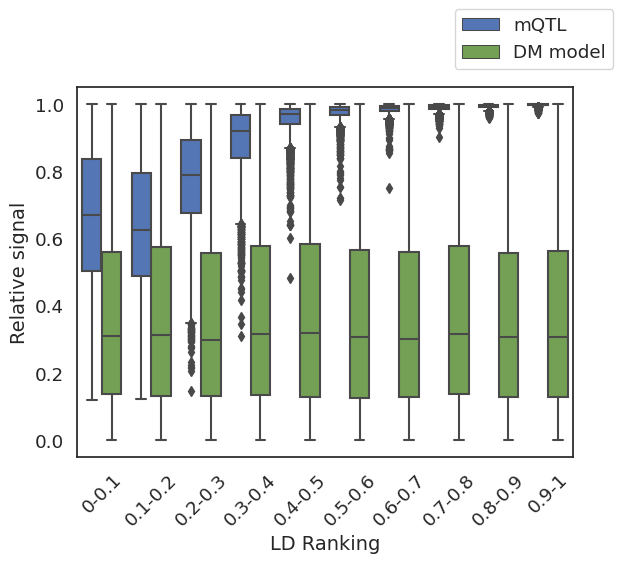

In [98]:
#Fig5D
sns.set_theme(context='notebook',style='white', font='Arial', font_scale=1.2)#设置图表背景颜色字体
x_order=['0-0.1','0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1']
ax = sns.boxplot(x='LD intervals',y='Relative_signal',hue='hue', data=pic_data_whole_final, palette=colors, order=x_order)
ax.set_xticklabels(labels = ['0-0.1','0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5','0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1'],
                                    rotation = 45)
plt.legend(loc='center right', bbox_to_anchor=(1.1, 1.13))
plt.xlabel('LD Ranking', fontsize = 14)
plt.ylabel('Relative signal', fontsize = 14)

Text(0, 0.5, 'DNAm level')

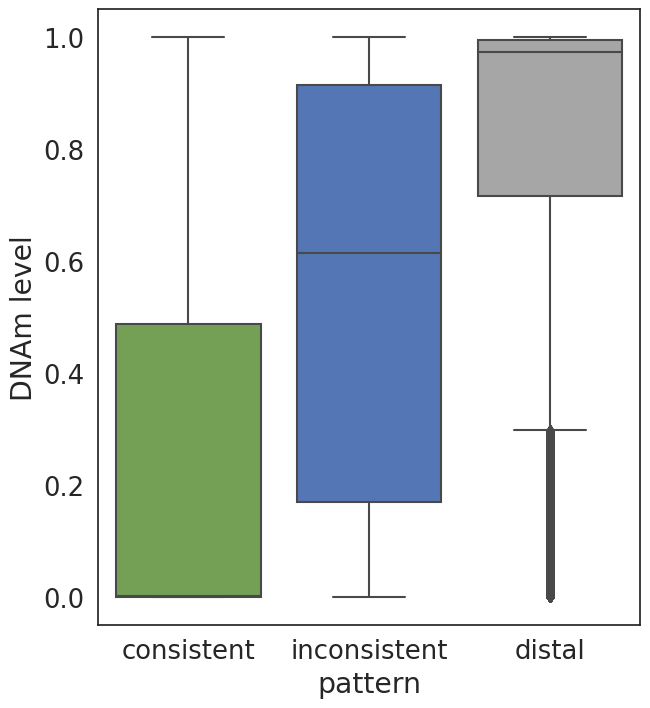

In [16]:
#Fig 6B
sns.set_theme(context='notebook',style='white', font='Arial', font_scale=1.7)#设置图表背景颜色字体
#sns.set_style('white', {'font.sans-serif':['SimHei', 'Arial']})#设置图表背景颜色字体
colors =['#70AD47','#4472C4','#A6A6A6']#设置bar颜色
#colors = sns.xkcd_palette(colors)
x_order=['consistent','inconsistent','distal']
plt.figure(figsize=(7,8))
sns.boxplot(x='mode',y='beta2', data=st_analysis, palette=colors, order=x_order)
#sns.despine() #移除边框线
plt.xlabel('pattern')
plt.ylabel('DNAm level')

/mnt/storage/personal_data/shijiayu/anaconda3/envs/tf2.9/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, '-log10(ΔDNAm)')

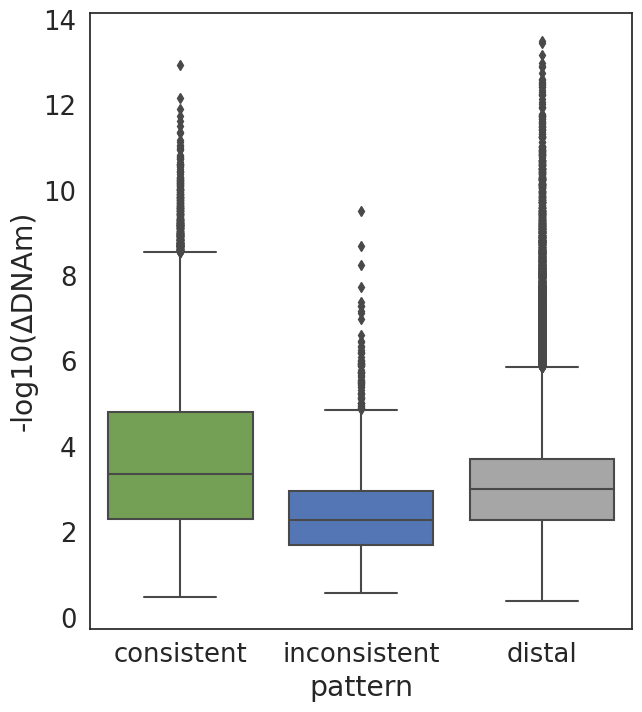

In [19]:
#Fig 6C
snp_cpg_dis.loc[:,'-log10(effect size)']=-np.log10(snp_cpg_dis.loc[:,'effct_size'])
sns.set_theme(context='notebook',style='white', font='Arial',font_scale=1.7)#设置图表背景颜色字体
#sns.set_style('white', {'font.sans-serif':['SimHei', 'Arial']})#设置图表背景颜色字体
colors =['#70AD47','#4472C4','#A6A6A6']#设置bar颜色
#colors = sns.xkcd_palette(colors)
x_order=['consistent','inconsistent','distal']
plt.figure(figsize=(7,8))
sns.boxplot(x='mode', y='-log10(effect size)', data=snp_cpg_dis, palette=colors, order=x_order)
#sns.despine() #移除边框线
plt.xlabel('pattern')
plt.ylabel('-log10(ΔDNAm)')